<a href="https://colab.research.google.com/github/steffiangel/AML/blob/main/2348510_aml_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df=pd.read_csv("/content/Program_2_Dataset - Program_2_Dataset.csv")

In [ ]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [ ]:
Dup_Rows = df[df.duplicated()]
Dup_Rows

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue


Text(0.5, 1.0, 'Number of Missing Values')

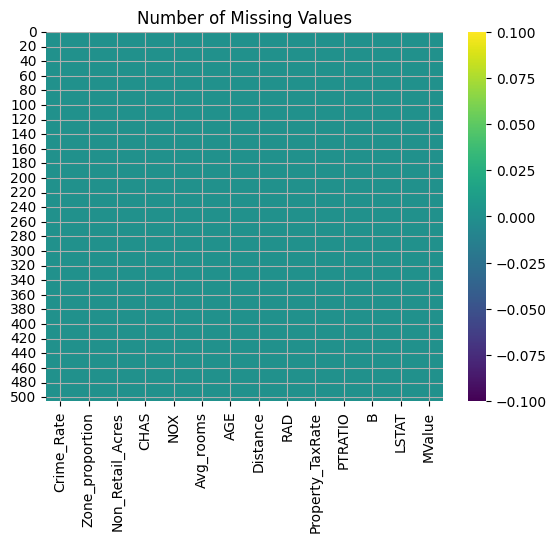

In [ ]:

sns.heatmap(df.isnull(),cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


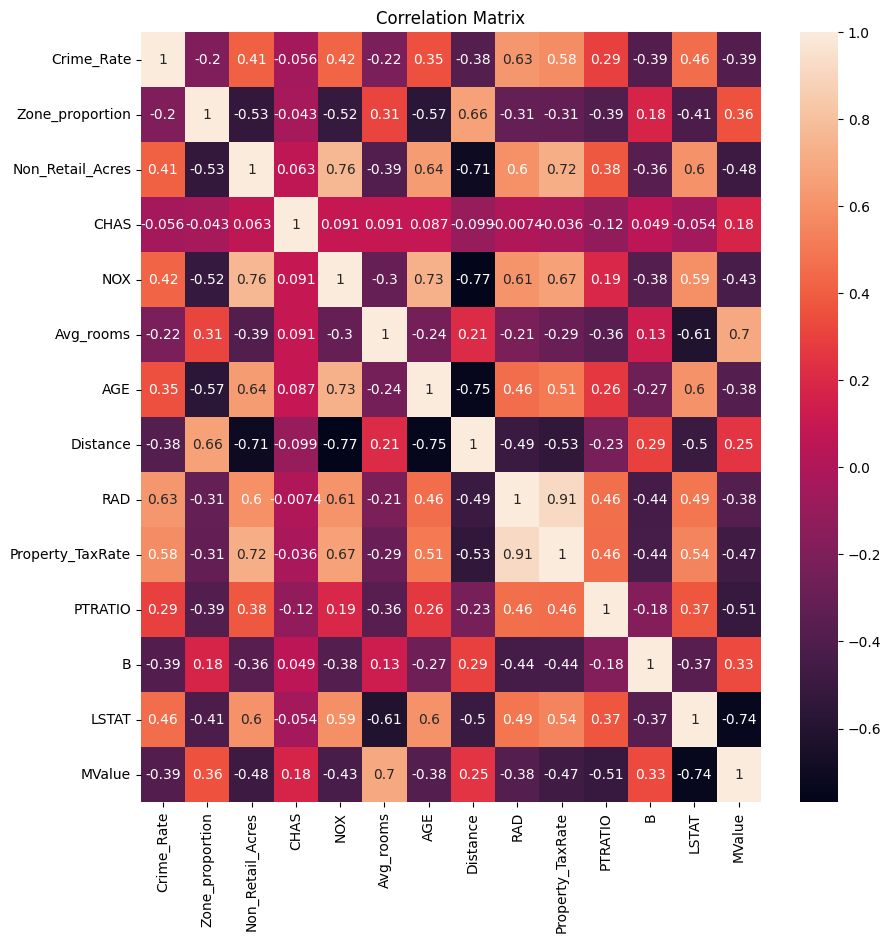

In [ ]:
plt.figure(figsize=(10,10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

In [12]:
X = df[['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']]
Y = df['MValue']

In [13]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns


for i in range(len(X.columns)):
    x_i = X[X.columns.difference([X.columns[i]])]
    y = X[X.columns[i]]
    r_squared = np.linalg.lstsq(x_i, y, rcond=None)[1][0]
    vif = 1 / (1 - r_squared)
    vif_data.at[i, "VIF"] = vif

print(vif_data)

           Variable           VIF
0         Avg_rooms -8.283751e-04
1          Distance -7.227615e-04
2  Property_TaxRate -1.404791e-07
3  Non_Retail_Acres -1.109433e-04


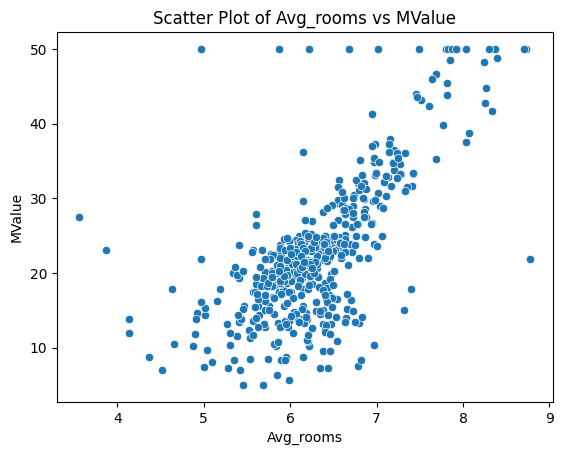

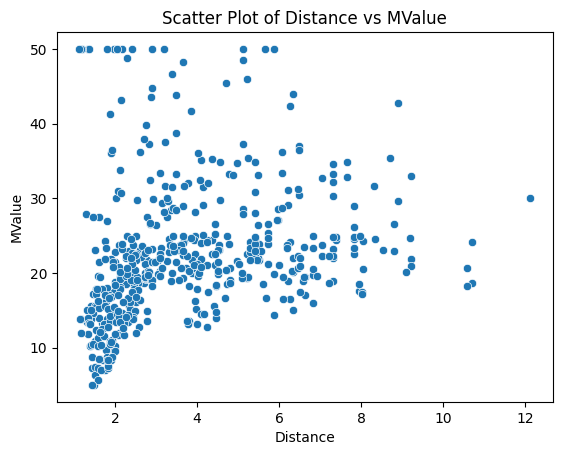

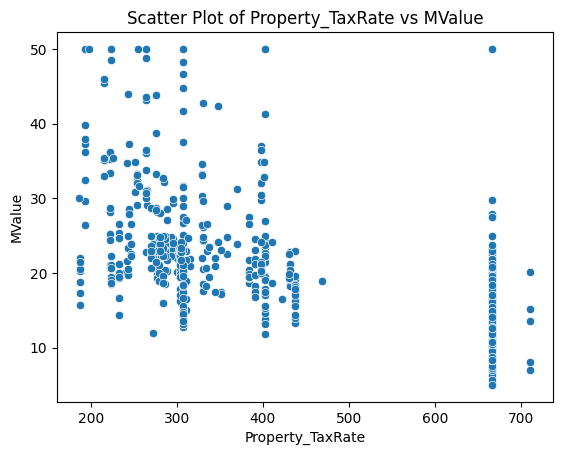

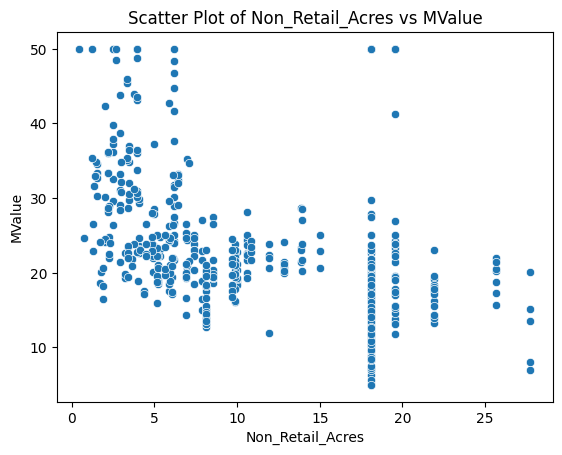

In [14]:
selected_predictors = ['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']
target_variable = 'MValue'

for predictor in selected_predictors:
    sns.scatterplot(x=df[predictor], y=df[target_variable])
    plt.title(f'Scatter Plot of {predictor} vs {target_variable}')
    plt.xlabel(predictor)
    plt.ylabel(target_variable)
    plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
X1 = df[['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']]
Y1= df['MValue']

In [27]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df
X = df[['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']]
Y = df['MValue']

# Add a column of ones for the intercept
X['Intercept'] = 1

# Convert dataframes to numpy arrays for easier matrix operations
X_matrix = X.to_numpy()
Y_matrix = Y.to_numpy()

# Calculate coefficients using the normal equation for multiple regression
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y_matrix

# Print the results
print('Coefficients:', coefficients[:-1])  # Exclude the intercept
print('Intercept:', coefficients[-1])

# Calculate the predicted values
min_best_fit_model = X_matrix @ coefficients

# Add the predicted values to the DataFrame
df['min_best_fit_model'] = min_best_fit_model

# Display relevant columns
print(df[['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres', 'MValue', 'min_best_fit_model']])


Coefficients: [ 7.65969996 -0.49269365 -0.01327669 -0.21321181]
Intercept: -15.941283403398112
     Avg_rooms  Distance  Property_TaxRate  Non_Retail_Acres  MValue  \
0        7.416    3.4952               276              2.89    33.2   
1        6.727    2.7778               384              8.56    27.5   
2        6.781    2.8561               384              8.56    26.5   
3        6.405    2.7147               384              8.56    18.6   
4        6.137    2.7147               384              8.56    19.3   
..         ...       ...               ...               ...     ...   
501      5.854    1.8956               666             18.10    10.8   
502      6.459    1.9879               666             18.10    11.8   
503      6.341    2.0720               666             18.10    14.9   
504      6.251    2.1980               666             18.10    12.6   
505      6.185    2.2616               666             18.10    14.1   

     min_best_fit_model  
0             

<ipython-input-27-dc415164ab33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


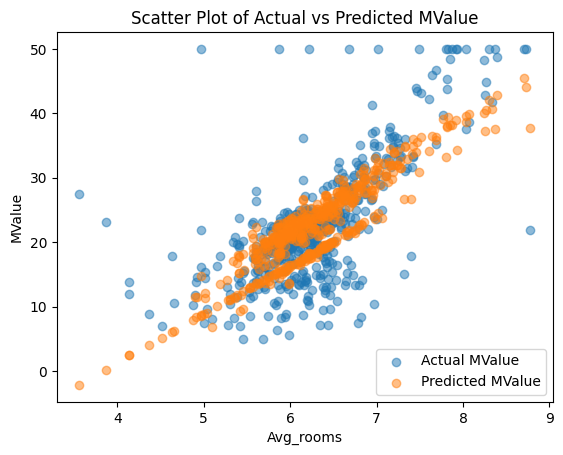

In [28]:
import matplotlib.pyplot as plt

# Scatter plot of the original data
plt.scatter(df['Avg_rooms'], df['MValue'], label='Actual MValue', alpha=0.5)

# Scatter plot of the predicted values
plt.scatter(df['Avg_rooms'], df['min_best_fit_model'], label='Predicted MValue', alpha=0.5)

# Set labels and title
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.title('Scatter Plot of Actual vs Predicted MValue')
plt.legend()

# Show the plot
plt.show()


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
coef = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient: {coef:.2f}')
print(f'Intercept: {intercept:.2f}')

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


Coefficient: 7.72
Intercept: -15.33


In [32]:
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Testing Mean Squared Error: {test_mse:.2f}')

print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

Training Mean Squared Error: 40.84
Testing Mean Squared Error: 27.57
Training R-squared: 0.55
Testing R-squared: 0.61


Linear Regression:  it assumes that the relationship between the dependent variable and the independent variables is linear.  it assumes that a change in one independent variable will result in a proportional change in the dependent variable.
Training Mean Squared Error (MSE): 40.84

The training MSE represents the average squared difference between the actual and predicted values on the training set.
A lower MSE indicates a better fit of the model to the training data.
MSE is not an absolute measure but is useful for comparing models or assessing improvements.

Testing Mean Squared Error (MSE): 27.57

The testing MSE is similar to the training MSE but is calculated on a separate dataset that the model has not seen during training.
A lower testing MSE indicates that the model generalizes well to new, unseen data.
Training R-squared: 0.55

R-squared (coefficient of determination) measures the proportion of the variance in the dependent variable (MValue) that is predictable from the independent variables (predictors).
An R-squared of 0.55 means that the model explains 55% of the variance in the training data.
It ranges from 0 to 1, where 1 indicates a perfect fit.
Testing R-squared: 0.61

Similar to the training R-squared, the testing R-squared indicates how well the model generalizes to new, unseen data.
An R-squared of 0.61 means that the model explains 61% of the variance in the testing data.
Coefficient: 7.72

This coefficient is associated with one of your predictor variables (possibly 'Avg_rooms' based on your previous discussions).
It represents the average change in the target variable (MValue) for a one-unit change in the predictor variable, assuming other variables are held constant.
Intercept: -15.33

The intercept is the value of the target variable (MValue) when all predictor variables are zero.

Overall, these metrics suggest that the model performs reasonably well. The R-squared values indicate a moderate level of explanation for the variance in both training and testing datasets. The MSE values provide a measure of the average squared error between predicted and actual values, with lower values indicating better performance.





